In [3]:
import sys

from mlxtend.data import loadlocal_mnist
# sys.path.append('data')
sys.path.append('/data/sha0w/hm02')
training_images, training_labels = loadlocal_mnist(
            images_path = '/data/sha0w/hm02/data/MINIST/train-images.idx3-ubyte',
            labels_path = '/data/sha0w/hm02/data/MINIST/train-labels.idx1-ubyte')

FileNotFoundError: [Errno 2] No such file or directory: '/data/sha0w/hm02/data/MINIST/train-labels.idx1-ubyte'

In [1]:
import matplotlib.pyplot as plt
def MatrixToImage(data):
    data = data.reshape([28,28])
    plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')


In [2]:
MatrixToImage(training_images[1])


NameError: name 'training_images' is not defined

In [36]:
def ds_build(label, data) :
    i = 0
    p_dict = dict()
    l = []
    d = []
    for la in label :
        if p_dict.__contains__(la) :
            tmp = p_dict[la] 
            if tmp <= 200 :
                p_dict[la] = tmp + 1
                l.append(la)
                d.append(data[i])
        else :
            p_dict[la] = 1
        i += 1
    return np.array(l, dtype=int), np.array(d, dtype=int)

#%

In [37]:
l_2000, d_2000 = ds_build(training_labels , training_images)

In [6]:
# sonar data build
import pandas as pd

ds_sonar = pd.read_csv('/data/sha0w/hm02/data/sonar/sonar.all-data').sample(frac = 1)

import numpy as np
sonar_label = ds_sonar.values[:,-1]
sonar_data = np.array(ds_sonar.values[:, 0:-1], dtype=float)

In [57]:
# vowel data build

ds_vowel = pd.read_csv('/data/sha0w/hm02/data/vowel/vowel-context.data', 
                       header = None, sep = ' ').\
    sample(frac = 1)

In [58]:
vowel_label = np.array(ds_vowel.values[:,-1])
vowel_data = np.array(ds_vowel.values[:, 0:-1])
print(vowel_label)

[ 2.  0.  0.  1.  9.  1.  0.  4.  2.  3.  0.  6.  0.  2.  4. 10. 10.  6.
  3.  0.  5.  8.  9.  6.  8.  3.  2.  3.  6. 10. 10.  0.  5.  0.  2.  0.
  8.  4.  9.  7.  1.  7.  3. 10.  2.  4.  9. 10. 10.  1.  1.  7.  7.  4.
  0.  1.  8.  0.  3.  2.  9. 10.  5.  7.  4.  5.  7.  9.  4.  9.  4.  5.
 10.  7.  7.  5.  9.  2.  6.  7. 10.  5.  4.  1.  5.  9. 10.  7.  1.  5.
  5.  4.  4.  4.  4.  0.  5.  0.  5.  9.  1.  0.  0.  8.  0. 10.  1.  5.
  0.  1.  4.  3.  2.  5.  7.  7.  3.  6.  0.  1.  7.  1. 10.  5.  2. 10.
  3.  6.  4.  8.  5.  4.  1. 10.  5.  3.  2.  2.  6.  6.  0.  8.  2.  0.
 10.  8.  4.  0.  5.  0.  3. 10.  0.  4. 10.  1.  4.  5.  1.  8.  8.  2.
  1.  1. 10.  6.  9.  4.  2.  5.  0.  3. 10.  5.  1.  2.  7.  8.  7.  6.
  8.  8.  9. 10.  4.  7.  5.  6.  0.  4.  9.  8.  9.  0.  1.  0.  2.  3.
  8.  2.  8.  8.  0.  3.  7.  0.  7.  3.  5.  9.  1.  9.  3.  4.  9. 10.
  8.  3.  2.  9.  3. 10.  1.  5.  3.  1.  3.  6.  1.  0.  6.  2.  1.  7.
 10. 10.  7.  8.  2.  4.  0.  5.  0.  9.  5.  8.  4

In [70]:
from scipy.spatial.distance import cdist
def calculate_S(W):
    d = np.sum(W, axis=1)
    D = np.sqrt(d*d[:, np.newaxis])
    return np.divide(W,D,where=D!=0)

def llgc_process_evaluate(ds, label, alpha, num, kernel) :
    from sklearn import preprocessing 
    from sklearn.semi_supervised import LabelSpreading
    F = np.concatenate((label[:num], -np.ones(label.shape[0]-num)))
    # Y_result = np.zeros_like(F)
    # Y_result[np.arange(len(F)), F.argmax(1)] = 1
    # Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]
    cls = LabelSpreading(max_iter=150, kernel=kernel, alpha=alpha)
    # X.astype(float) 为了防止报错 "Numerical issues were encountered "
    cls.fit(preprocessing.scale(ds.astype(float)), F)
    ind_unlabeled = np.arange(num, len(ds))
    y_pred = cls.transduction_[ind_unlabeled]
    y_true = label[num:].astype(y_pred.dtype)
    times = 0
    right_times = 0
    for pred in y_pred :
        if pred == y_true[times] :
            right_times += 1
        times += 1
    return right_times / times

In [72]:
# rbf knn

0.8318840579710145

In [ ]:
# 最大 1.0
def core_w_ij(xi, xj, l) :
    # print(xi - xj)
    return np.exp(-1 * ((xi - xj).sum() ** 2) / (2 * (l ** 2)))

def mk_matrix (data, l, dic) :
    if dic.__contains__(l) : 
        print("已计算矩阵，跳过")
        return dic[l]
    size = data.shape[0]
    initial_matrix = np.zeros([size,size])
    for i in range(size) : 
        for j in range(size) :
            initial_matrix[i,j] = \
                core_w_ij(data[i], data[j], l)
            # print(initial_matrix)
    initial_D = np.zeros([size,size])
    for i in range(size) : 
        s = np.array(initial_matrix[i]).sum()
        initial_D[i,i] = s + 0.01
    dic[l] = (initial_matrix, initial_D)
    return initial_matrix, initial_D

def get_UU(matrix, labeled_num) : 
    return matrix[labeled_num:, labeled_num:]

def get_UL(matrix, labeled_num) :
    return matrix[labeled_num: , :labeled_num]

def grf_process_evaluate(l, ds, label, labeled_num) :
    l_dict = dict()
    initial_matrix, initial_D = mk_matrix(ds, l, l_dict)
    Wuu = get_UU(initial_matrix, labeled_num)
    Duu = get_UU(initial_D, labeled_num)
    fl = np.array(label[0:labeled_num], dtype=float).reshape([-1,1])
    fu = np.array(label[labeled_num:], dtype=int)
    Wul = get_UL(initial_matrix, labeled_num)
    fu_ = np.dot(np.linalg.inv(Duu - Wuu),np.dot(Wul, fl))
    ind = 0
    get = 0
    for label_u in fu_ :
        i = int(label_u)
        if (label_u - i) > 0.5 : l_predict = i + 1
        else : l_predict = i
        if l_predict == int(fu[ind]) :
            get += 1
        # print(l_predict, fu[ind])
        ind += 1
    return get


def E(f, matrix) :
    size = matrix.shape[0]
    e = 0
    for i in range(size) : 
        for j in range(size) :
            e += (matrix[i, j] * (f(i) - f(j)) ** 2) 
    return e / 2

In [10]:
x1 = np.array([1,2,3])
x2 = np.array([2,4,3])
(x2 -x1).sum()
# a,b = mk_matrix(vowel_data, 0.1)

3

In [11]:
result = []
dtnum = vowel_data.shape[0]
print(dtnum)

990


In [60]:
result_vowel = []
dtnum = vowel_data.shape[0]
print(dtnum)
for i in range(10) :
    l = 0.1 * (i + 1)
    for percentage in [0.2, 0.3, 0.4]:
        print("start to test at per ", percentage)
        get = grf_process_evaluate(l, vowel_data, vowel_label, int(dtnum * percentage))
        print("the lambda is ", l, " the right num is ", get)
        result_vowel.append(get / (dtnum * (1 - percentage)))
print(result_vowel)

990
start to test at per  0.2
the lambda is  0.1  the right num is  97
start to test at per  0.3
the lambda is  0.1  the right num is  102
start to test at per  0.4
the lambda is  0.1  the right num is  78
start to test at per  0.2
the lambda is  0.2  the right num is  88
start to test at per  0.3
the lambda is  0.2  the right num is  90
start to test at per  0.4
the lambda is  0.2  the right num is  90
start to test at per  0.2
the lambda is  0.30000000000000004  the right num is  90
start to test at per  0.3
the lambda is  0.30000000000000004  the right num is  92
start to test at per  0.4
the lambda is  0.30000000000000004  the right num is  79
start to test at per  0.2
the lambda is  0.4  the right num is  83
start to test at per  0.3
the lambda is  0.4  the right num is  75
start to test at per  0.4
the lambda is  0.4  the right num is  69
start to test at per  0.2
the lambda is  0.5  the right num is  85
start to test at per  0.3
the lambda is  0.5  the right num is  65
start to 

In [98]:
result_sonar = []
result_sonar_knn = []
result_sonar_rbf = []
dtnum = sonar_data.shape[0]
print(dtnum)
for i in range(10) :
    l = 0.1 * (i + 1)
    for percentage in [0.2, 0.3, 0.4]:
        # print("start to test at per ", percentage)
        get = grf_process_evaluate(0.1 * (i + 1), sonar_data, sonar_label, int(dtnum * percentage))
        # print("the lambda is ", 0.1 * (i + 1), " the right num is ", get)
        result_sonar.append(get / (dtnum * (1 - percentage)))

        # break
print(result_sonar)


207
[0.5676328502415459, 0.572808833678399, 0.5555555555555556, 0.5012077294685989, 0.5452035886818496, 0.5555555555555556, 0.5072463768115941, 0.572808833678399, 0.5877616747181965, 0.5193236714975845, 0.5659075224292617, 0.5636070853462158, 0.5253623188405796, 0.5659075224292617, 0.6119162640901772, 0.5495169082125603, 0.5659075224292617, 0.5797101449275363, 0.5495169082125603, 0.5590062111801243, 0.5636070853462158, 0.5495169082125603, 0.5590062111801243, 0.5636070853462158, 0.5495169082125603, 0.5590062111801243, 0.5636070853462158, 0.5434782608695652, 0.5590062111801243, 0.5636070853462158]


In [73]:

result_MINIST = []
dtnum = d_2000.shape[0]
print(dtnum)
for i in range(10) :
    l = 0.1 * (i + 1)
    for percentage in [0.2, 0.3, 0.4]:
        # print("start to test at per ", percentage)
        get = grf_process_evaluate(0.1 * (i + 1), d_2000, l_2000, int(dtnum * percentage))
        # print("the lambda is ", 0.1 * (i + 1), " the right num is ", get)
        result_MINIST.append(get / (dtnum * (1 - percentage)))
        # break
print(result_MINIST)

2000
[0.1025, 0.10285714285714286, 0.10416666666666667, 0.1025, 0.10285714285714286, 0.10416666666666667, 0.103125, 0.10071428571428571, 0.1, 0.103125, 0.10285714285714286, 0.1025, 0.103125, 0.10214285714285715, 0.10166666666666667, 0.101875, 0.10071428571428571, 0.10166666666666667, 0.1025, 0.10357142857142858, 0.10666666666666667, 0.101875, 0.10428571428571429, 0.1075, 0.105625, 0.10571428571428572, 0.10666666666666667, 0.108125, 0.10785714285714286, 0.11083333333333334]


In [42]:
print(result_sonar)

[0.53743961352657, 0.572808833678399, 0.5636070853462158, 0.5012077294685989, 0.5452035886818496, 0.5555555555555556, 0.5132850241545893, 0.572808833678399, 0.5877616747181965, 0.5193236714975845, 0.5659075224292617, 0.5636070853462158, 0.5253623188405796, 0.5659075224292617, 0.6119162640901772, 0.5495169082125603, 0.5659075224292617, 0.5797101449275363, 0.5495169082125603, 0.5590062111801243, 0.5636070853462158, 0.5495169082125603, 0.5590062111801243, 0.5636070853462158, 0.5434782608695652, 0.5590062111801243, 0.5636070853462158, 0.5434782608695652, 0.5590062111801243, 0.5636070853462158, 0.1025, 0.10285714285714286, 0.10416666666666667, 0.1025, 0.10285714285714286, 0.10416666666666667, 0.103125, 0.10071428571428571, 0.1, 0.103125, 0.10285714285714286, 0.1025, 0.103125, 0.10214285714285715, 0.10166666666666667, 0.101875, 0.10071428571428571, 0.10166666666666667, 0.1025, 0.10357142857142858, 0.10666666666666667, 0.101875, 0.10428571428571429, 0.1075, 0.105625, 0.10571428571428572, 0.10

In [76]:
def evaluate(ds, label) : 
    result_knn = []
    result_rbf = []
    dtnum = ds.shape[0]
    print(dtnum)
    for i in range(10) :
        l = 0.1 * (i + 1) - 0.05
        for percentage in [0.2, 0.3, 0.4]:
            knn = llgc_process_evaluate(ds, kernel="knn", alpha=l, label = label, num = int(dtnum * percentage))
            rbf = llgc_process_evaluate(ds, kernel="rbf", alpha=l, label = label, num = int(dtnum * percentage))
            result_rbf.append(rbf)
            result_knn.append(knn)
    return result_knn, result_rbf

In [77]:
vowel_ = evaluate(vowel_data, vowel_label)

minist_ = evaluate(d_2000, l_2000)

sonar_ = evaluate(sonar_data, sonar_label)

990
2000
207


/data/root/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=150 was reached without convergence.
  category=ConvergenceWarning
/data/root/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=150 was reached without convergence.
  category=ConvergenceWarning
/data/root/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=150 was reached without convergence.
  category=ConvergenceWarning
/data/root/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=150 was reached without convergence.
  category=ConvergenceWarning
/data/root/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/data/root/anaconda3/

In [106]:

def plot_result (re, num, name) :
    data = re.reshape(-1, num)
    import matplotlib.pyplot as plt
    import numpy as np
    rng = np.arange(10)
    rng = rng * 0.1
    rnd = data
    print(rng.shape)
    print(rnd.shape)
    fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
    ind = 0
    for label in ['0.2', '0.3', '0.4'] :
        ax[ind].stackplot(rng, rnd[ind], labels = [label])
        ax[ind].set_title('不同训练集比例与alpha设置下，模型的准确度')
        ax[ind].legend(loc='upper left')
        ax[ind].set_ylabel('准确度')
        ax[ind].set_xlabel('采用的alpha')
        ind += 1
        # ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
    fig.tight_layout()
    fig.savefig(dpi = 400, fname=name)

(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)
(10,)
(3, 10)


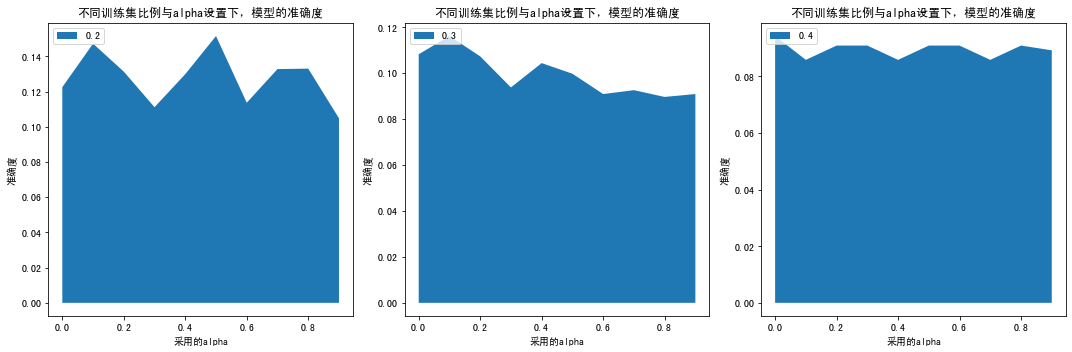

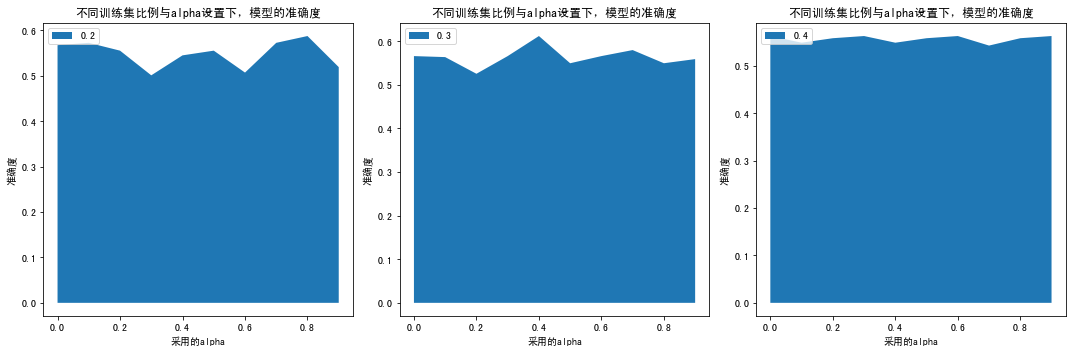

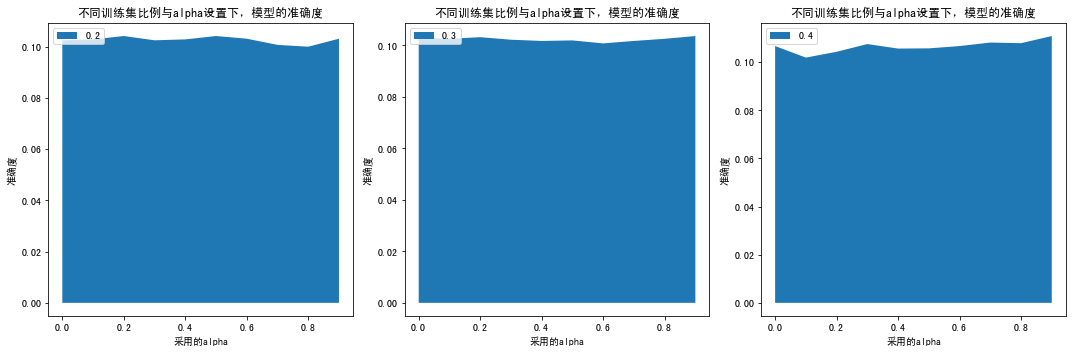

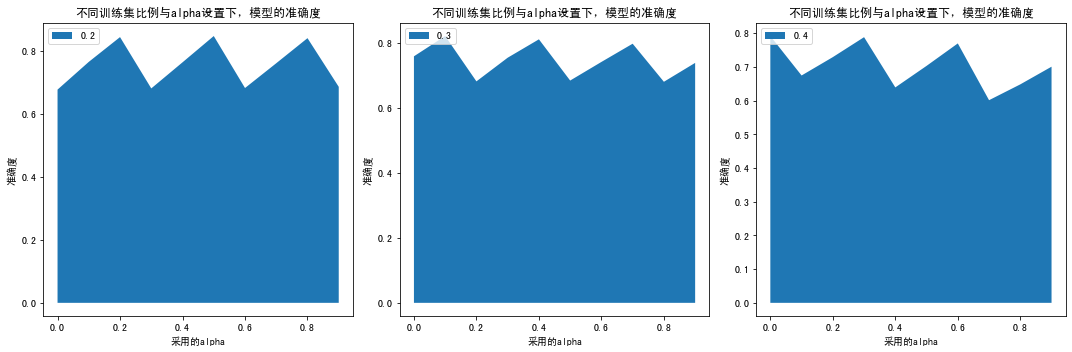

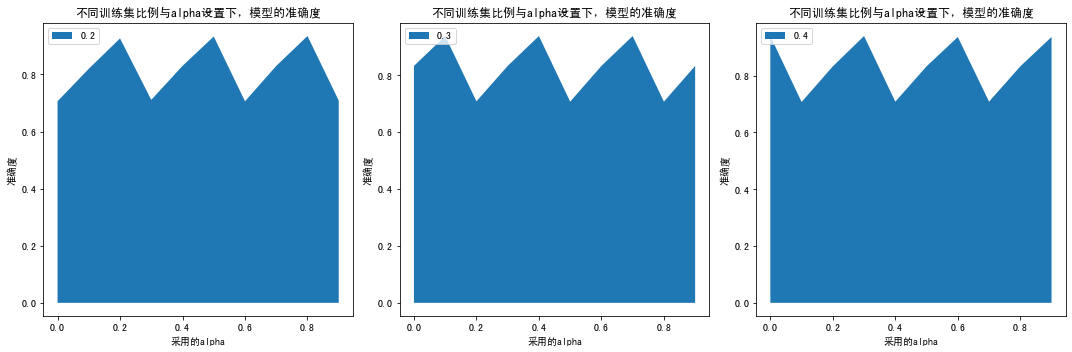

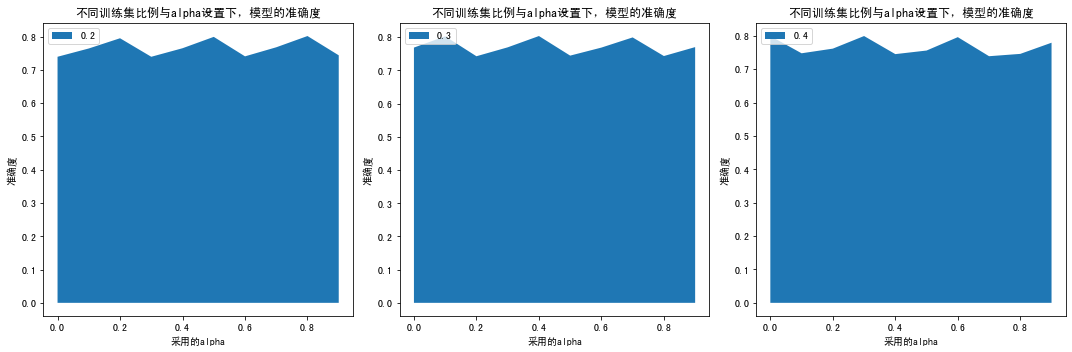

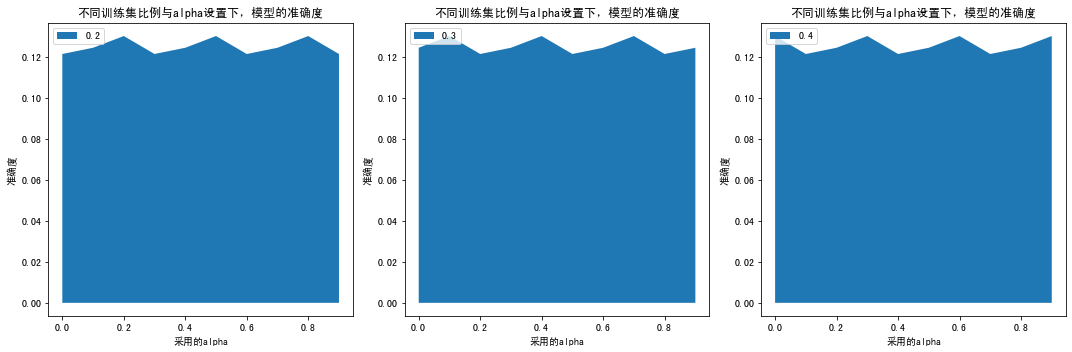

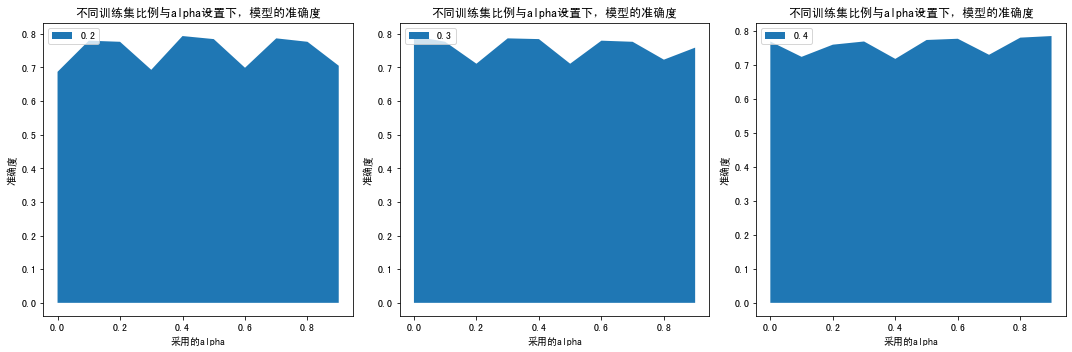

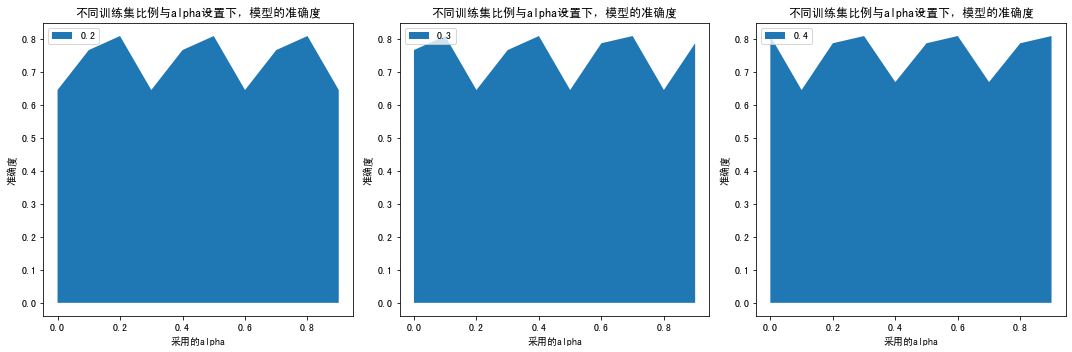

In [108]:
plot_result(np.array(result_vowel), 10, "result_vowel")
plot_result(np.array(result_sonar), 10, "result_sonar")
plot_result(np.array(result_MINIST), 10, "result_MINIST")
plot_result(np.array(vowel_[0]), 10, "vowel_knn")
plot_result(np.array(vowel_[1]), 10, "vowel_rbfn")
plot_result(np.array(minist_[0]), 10, "vminist_knn")
plot_result(np.array(minist_[1]), 10, "minist_rbfn")
plot_result(np.array(sonar_[0]), 10, "sonar_knn")
plot_result(np.array(sonar_[1]), 10, "sonar_rbfn")

(50,)
(3, 50)


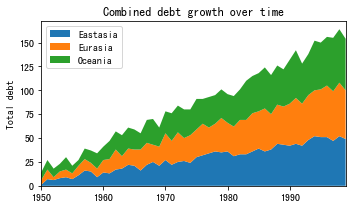

In [88]:

import matplotlib.pyplot as plt
import numpy as np
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng
print(rng.shape)
print(rnd.shape)
fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()